# Objective

# Preparation

## Load libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn import metrics as met
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import RadiusNeighborsClassifier, KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, train_test_split
import os
import errno

### Create folder structure

In [2]:
# Make root folder the current working directory
os.chdir('..')

In [3]:
output_folder = './reports/figures/'

In [4]:
cleaned_folder = './data/processed/'

In [5]:
external_data = './data/external/'

# Import data

In [6]:
x_train = pd.read_csv(cleaned_folder+'x_train.csv')
x_test = pd.read_csv(cleaned_folder+'x_test.csv')
y_train = pd.read_csv(cleaned_folder+'y_train.csv')
y_test = pd.read_csv(cleaned_folder+'y_test.csv')
test_df = pd.read_csv(cleaned_folder+'test_df.csv')

In [7]:
y_test = y_test['TARGET']
y_train = y_train['TARGET']

## Select algorithms to run

In [8]:
classifiers = {'Gradient Boosting Classifier': GradientBoostingClassifier(), 
               'Ada Boost Classifier':AdaBoostClassifier(),
               'Linear Discriminant Analyis': LinearDiscriminantAnalysis(),
               'GaussianNB':GaussianNB(),
               'BerNB':BernoulliNB(),
               'KNN':KNeighborsClassifier(),
               'Random Forest Classifier': RandomForestClassifier(),
               'Decision Tree Classifier' : DecisionTreeClassifier(),
               'Logistic Regression': LogisticRegression()}

In [9]:
# Run selected classifiers and select best algorithm to predict survival of test dataset
base_accuracy = 0
model_outcomes = []
for Name,classify in classifiers.items():
    classify.fit(x_train, y_train)
    predicting_y = classify.predict(x_test)
    model_outcomes.append({
    'Algorithm': str(Name),
    'Score': str(met.accuracy_score(y_test, predicting_y))
    })

    if met.accuracy_score(y_test,predicting_y) > base_accuracy:
        base_accuracy = met.accuracy_score(y_test,predicting_y)

    else:
        continue

In [11]:
model_scores = pd.DataFrame(model_outcomes, columns=['Algorithm','Score'])
model_scores.sort_values(by=['Score'] , ascending=False)

,Algorithm,Score
1,Ada Boost Classifier,0.9181384703414076
2,Linear Discriminant Analyis,0.9181384703414076
6,Random Forest Classifier,0.9181384703414076
8,Logistic Regression,0.9181384703414076
0,Gradient Boosting Classifier,0.9181130396083668
5,KNN,0.9118697946468307
4,BerNB,0.8690190094729481
7,Decision Tree Classifier,0.8288893127344396
3,GaussianNB,0.7574162375230467


### Remove least important features through feature ranking with recursive feature elimination 

In [12]:
# select model to run based on previously identified best predicting algorithm
model = GradientBoostingClassifier()

In [15]:
rfecv = RFECV(estimator=model, step=5, cv=StratifiedKFold(5), scoring='accuracy' )
rfecv.fit(x_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                           criterion='friedman_mse', init=None,
                                           learning_rate=0.1, loss='deviance',
                                           max_depth=3, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100,
                                           n_iter_no_change=None,
                                           presort='deprecated',
                                          

In [16]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 2


In [17]:
rfecv.grid_scores_

array([0.91693414, 0.91693959, 0.91692869, 0.91692324, 0.91692324,
       0.91692324, 0.9169069 ])

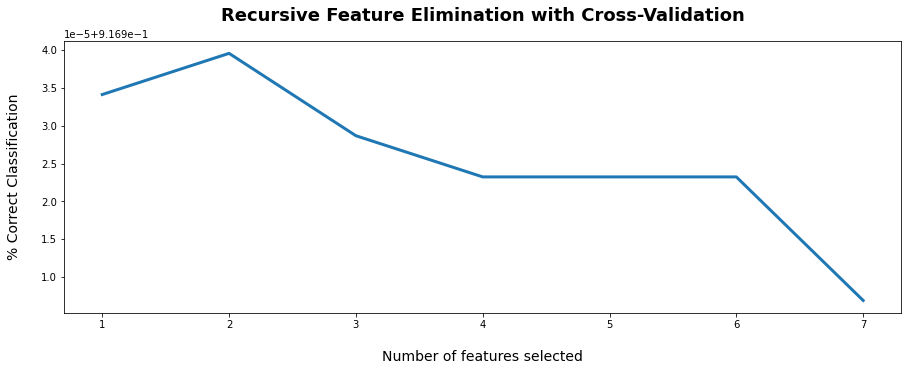

In [18]:
plt.figure(figsize=(15, 5))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, linewidth=3)

plt.show()

In [19]:
rfecv.estimator_.feature_importances_

array([0.38508451, 0.61491549])

In [22]:
rfecv.grid_scores_

array([0.91693414, 0.91693959, 0.91692869, 0.91692324, 0.91692324,
       0.91692324, 0.9169069 ])

In [20]:
feature_imp_df = pd.DataFrame()
feature_imp_df['feature'] = x_train.columns
feature_imp_df['importance'] = rfecv.grid_scores_

ValueError: Length of values (7) does not match length of index (27)

In [21]:
# Order features by predictor value according to RFECV
feature_imp_df.sort_values(by=['importance'],ascending=False,inplace=True)

KeyError: 'importance'

In [ ]:
# Plot features and their RFECV score
feature_imp_df.plot.bar(x='feature', y='importance')

In [ ]:
qqq

In [ ]:
columns = x_train.columns
columns

In [ ]:
# Select most important features according to RFECV
rfecv_features = columns[criteria]

x_train = x_train[rfecv_features]
x_test = x_test[rfecv_features]
X_train = X_train[rfecv_features]
test_df = test_df[rfecv_features]

In [ ]:
# Re-run selected classifiers and select best algorithm to predict survival of test dataset
base_accuracy = 0
model_outcomes = []
for Name,classify in classifiers.items():
    classify.fit(x_train,y_train)
    predicting_y = classify.predict(x_test)
    model_outcomes.append({
    'Algorithm': str(Name),
    'Score': str(met.accuracy_score(y_test,predicting_y))
    })

    if met.accuracy_score(y_test,predicting_y) > base_accuracy:
        #prediction = classify.predict(test_df)
        base_accuracy = met.accuracy_score(y_test,predicting_y)

    else:
        continue

In [ ]:
model_scores = pd.DataFrame(model_outcomes, columns=['Algorithm','Score'])
model_scores.sort_values(by=['Score'] , ascending=False)

# Find best algorithms and parameters by applying Hyper Parameter tuning

In [ ]:
classifiers = {'Random_forest': {'model': RandomForestClassifier(), 'params' : {'n_estimators': [31, 35, 37]}},
               'Logistic_regression': {'model': LogisticRegression(solver='liblinear', multi_class='auto'), 
                                       'params' : {'C': [1, 10, 100, 1000],
                                       'penalty': ['l1','l2'],}},
               'AdaBoostClassifier': {'model': AdaBoostClassifier(DecisionTreeClassifier(), random_state=7), 'params' :
                                     {"base_estimator__criterion" : ["gini", "entropy"],
                                      "base_estimator__splitter" :   ["best", "random"],
                                      "learning_rate":  [0.1, 0.3, 1.5]}},
               'GradientBoostingClassifier': {'model' : GradientBoostingClassifier(), 'params' :
                                     {'loss' : ["deviance"],
                                      'n_estimators' : [360, 380, 400],
                                      'learning_rate': [0.015, 0.02, 0.03],
                                      'max_depth': [2, 3, 4],
                                      'min_samples_leaf': [60, 70, 80],
                                     }},
               'KNearestNeighbors': {'model': KNeighborsClassifier(),
                                     'params' : {'n_neighbors':[2, 5, 7],
                                         'metric':['euclidean', 'minkowski']}},

              }

In [ ]:
scores = []
for model_name, mp in classifiers.items():
    grid = GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False, n_jobs=-1)
    grid.fit(X_train,y)
    scores.append({
        'model': model_name,
        'best_score': grid.best_score_,
        'best_params': grid.best_params_
    })

In [ ]:
model_parameters = pd.DataFrame(scores, columns=['model','best_score','best_params'])
model_parameters

In [ ]:
model_parameters.iloc[3,2]

In [ ]:
RBC = GradientBoostingClassifier(learning_rate=0.02, 
                                 loss='deviance', 
                                 max_depth=3, 
                                 min_samples_leaf=70, 
                                 n_estimators=380)
RBC.fit(X_train,y)

In [ ]:
Y_pred_train = RBC.predict(X_train)

In [ ]:
# Generate table of predictions vs actual
pd.crosstab(Y_pred_train, Y_train)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(Y_pred_train, Y_train))
print()
print("Classification Report")
print(classification_report(Y_pred_train, Y_train))

In [ ]:
prediction = RBC.predict(test_df)

In [ ]:
# Generate Submission File
predicted_test_values = pd.DataFrame({'SK_ID_CURR': SK_ID_CURR,'TARGET' :prediction})
predicted_test_values.to_csv(external_data + 'Submission_file.csv',index = False)

In [ ]:
predicted_test_values